Link de Colab: https://colab.research.google.com/drive/1Y-cNUkmFeB6cnUcKa2WyfSjlyuTM8JiQ

In [ ]:
!pip install --upgrade pip
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
from collections import Counter
import unicodedata
import re

nlp_es = spacy.load('es_core_news_lg')

df = pd.read_csv('/content/data-unlabeled.csv')

# Función para limpiar el texto
def lmpTxt(text):
    # Elimina caracteres especiales y normaliza el texto
    txt = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    # Convierte el texto a minúsculas
    txt = txt.lower()
    # Limpieza de URLs
    txt = re.sub('(https?|ftp|file):\/\/\S+', " ", txt)
    # Limpieza de usernames
    txt = re.sub('(@[^\s]+\s)', " ", txt)
    # Limpieza de hashtags
    txt = re.sub('(#[^\s]+\s)', " ", txt)
    # Limpieza de la palabra "rt" (retweets)
    txt = re.sub('^rt', "", txt)
    # Limpiar otros caracteres especiales
    txt = re.sub('\W+', " ", txt)
    # Limpieza de caracteres blancos al inicio y al final
    txt = txt.strip()
    return txt

# Aplicamos la función de limpieza al texto de la columna 'text' y almacenar los resultados en una nueva columna 'textDep'
df['textDep'] = df['text'].apply(lambda x: lmpTxt(x))

# Función para extraer verbos en infinitivo
def extraer_verbos(text):
    doc = nlp_es(text)
    return [token.lemma_ for token in doc
              if token.tag_ == 'VERB']

# Aplicamos la función de extracción de verbos a cada texto
all_verbos = [verb for text in df['textDep']
                  for verb in extraer_verbos(text)]

# Contamos la frecuencia de cada verbo
contar_verbos = Counter(all_verbos)

# Creamos un DataFrame con los resultados
verbos_df = pd.DataFrame(contar_verbos.items(), columns=['Verbo', 'Repeticiones'])

# Ordenamos el DataFrame en orden descendente
verbos_ordenados = verbos_df.sort_values(by='Repeticiones', ascending=False)


In [ ]:
verbos_ordenados.head(10)

,Verbo,Repeticiones
12,tener,276
48,hacer,269
27,decir,211
31,dar,112
3,pagar,112
30,ver,109
85,querer,95
7,ir,81
140,seguir,78
238,pedir,70


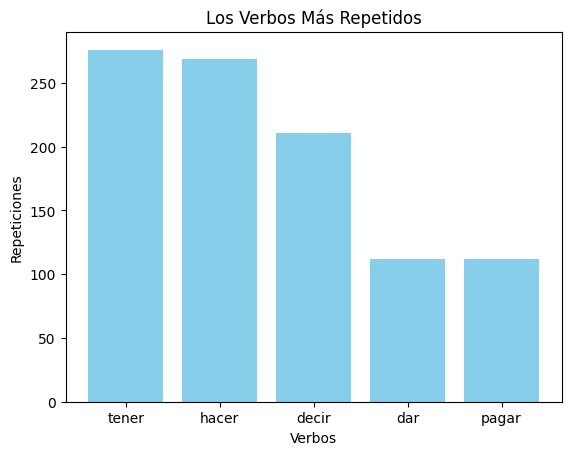

In [ ]:
import matplotlib.pyplot as plt
top = verbos_ordenados.head(5)
# Grafica de barras
plt.bar(top['Verbo'], top['Repeticiones'], color='skyblue')
plt.xlabel('Verbos')
plt.ylabel('Repeticiones')
plt.title('Los Verbos Más Repetidos')
plt.show()

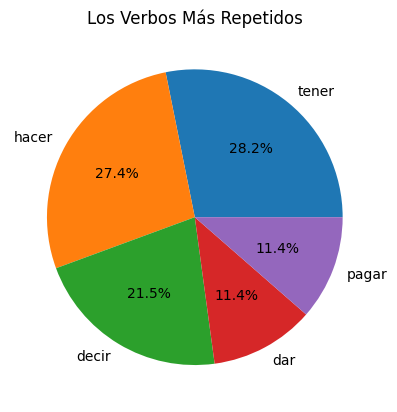

In [ ]:
# Grafica de pastel
plt.pie(top['Repeticiones'], labels=top['Verbo'], autopct='%1.1f%%')
plt.title('Los Verbos Más Repetidos')
plt.show()